In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset_path = '/content/drive/MyDrive/animal_data'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
import seaborn as sns

In [5]:
SIZE = 128

train_images = []
train_labels = []

In [10]:
for class_dir in glob.glob(os.path.join(dataset_path, '*')):
    class_name = os.path.basename(class_dir)
    train_path = os.path.join(class_dir, 'train')
    if not os.path.exists(train_path):
        continue

    print(f'Processing class: {class_name}, train path: {train_path}')

    for img_path in glob.glob(os.path.join(train_path, '*.jpg')):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        if img is None:
            print(f'Warning: Unable to load image {img_path}')
            continue

        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        train_images.append(img)
        train_labels.append(class_name)

Processing class: elephant, train path: /content/drive/MyDrive/animal_data/elephant/train
/content/drive/MyDrive/animal_data/elephant/train/af_tr278.jpg
/content/drive/MyDrive/animal_data/elephant/train/af_tr43.jpg
/content/drive/MyDrive/animal_data/elephant/train/af_tr401.jpg
/content/drive/MyDrive/animal_data/elephant/train/as_tr132.jpg
/content/drive/MyDrive/animal_data/elephant/train/af_tr96.jpg
/content/drive/MyDrive/animal_data/elephant/train/as_tr36.jpg
/content/drive/MyDrive/animal_data/elephant/train/as_tr178.jpg
/content/drive/MyDrive/animal_data/elephant/train/af_tr381.jpg
/content/drive/MyDrive/animal_data/elephant/train/af_tr303.jpg
/content/drive/MyDrive/animal_data/elephant/train/as_tr133.jpg
/content/drive/MyDrive/animal_data/elephant/train/as_tr412.jpg
/content/drive/MyDrive/animal_data/elephant/train/as_tr23.jpg
/content/drive/MyDrive/animal_data/elephant/train/af_tr104.jpg
/content/drive/MyDrive/animal_data/elephant/train/as_tr341.jpg
/content/drive/MyDrive/animal_da

In [11]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [12]:
test_images = []
test_labels = []

for class_dir in glob.glob(os.path.join(dataset_path, '*')):
    class_name = os.path.basename(class_dir)
    test_path = os.path.join(class_dir, 'test')
    if not os.path.exists(test_path):
        continue

    print(f'Processing class: {class_name}, test path: {test_path}')

    for img_path in glob.glob(os.path.join(test_path, '*.jpg')):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        if img is None:
            print(f'Warning: Unable to load image {img_path}')
            continue

        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        test_images.append(img)
        test_labels.append(class_name)

Processing class: elephant, test path: /content/drive/MyDrive/animal_data/elephant/test
/content/drive/MyDrive/animal_data/elephant/test/af_te26.jpg
/content/drive/MyDrive/animal_data/elephant/test/af_te11.jpg
/content/drive/MyDrive/animal_data/elephant/test/af_te14.jpg
/content/drive/MyDrive/animal_data/elephant/test/af_te19.jpg
/content/drive/MyDrive/animal_data/elephant/test/af_te36.jpg
/content/drive/MyDrive/animal_data/elephant/test/af_te21.jpg
/content/drive/MyDrive/animal_data/elephant/test/af_te28.jpg
/content/drive/MyDrive/animal_data/elephant/test/af_te16.jpg
/content/drive/MyDrive/animal_data/elephant/test/af_te25.jpg
/content/drive/MyDrive/animal_data/elephant/test/af_te1.jpg
/content/drive/MyDrive/animal_data/elephant/test/af_te37.jpg
/content/drive/MyDrive/animal_data/elephant/test/af_te17.jpg
/content/drive/MyDrive/animal_data/elephant/test/af_te2.jpg
/content/drive/MyDrive/animal_data/elephant/test/af_te33.jpg
/content/drive/MyDrive/animal_data/elephant/test/af_te12.jpg

In [13]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [15]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [16]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [17]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [18]:
feature_extractor = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
X_for_RF = feature_extractor.predict(x_train)

251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


In [20]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [21]:
RF_model.fit(X_for_RF, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [22]:
X_test_feature = feature_extractor.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [23]:
prediction_RF = RF_model.predict(X_test_feature)

In [24]:
prediction_RF = le.inverse_transform(prediction_RF)

In [25]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

Accuracy =  0.6236842105263158


In [28]:
from sklearn.metrics import confusion_matrix

<Axes: >

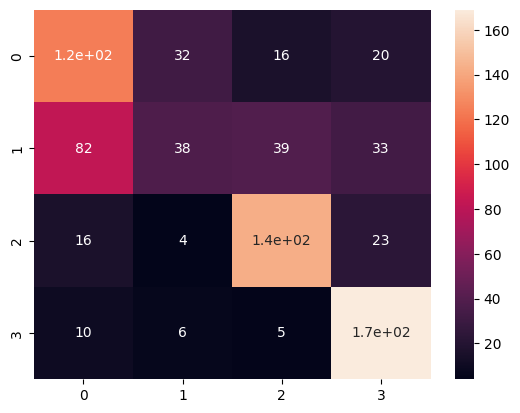

In [30]:
cm = confusion_matrix(test_labels, prediction_RF)
sns.heatmap(cm, annot=True)